In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#训练集总共1100条数据
data_train = pd.read_csv('./csv/pfm_train.csv')
#测试集总共350条数据
data_test = pd.read_csv('./csv/pfm_test.csv')
data = pd.concat([data_train,data_test],axis = 0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 349
Data columns (total 31 columns):
Age                         1450 non-null int64
Attrition                   1100 non-null float64
BusinessTravel              1450 non-null object
Department                  1450 non-null object
DistanceFromHome            1450 non-null int64
Education                   1450 non-null int64
EducationField              1450 non-null object
EmployeeNumber              1450 non-null int64
EnvironmentSatisfaction     1450 non-null int64
Gender                      1450 non-null object
JobInvolvement              1450 non-null int64
JobLevel                    1450 non-null int64
JobRole                     1450 non-null object
JobSatisfaction             1450 non-null int64
MaritalStatus               1450 non-null object
MonthlyIncome               1450 non-null int64
NumCompaniesWorked          1450 non-null int64
Over18                      1450 non-null object
OverTime             

In [3]:
for i in data_train.columns:
    if data_train[i].dtype == 'int64':
        print(i + ':')
        print((data_train[data_train['Attrition'] == 1.0][i].value_counts()/data_train[i].value_counts()).sort_values(ascending = False))
        print('-----------------------')

Age:
21    0.714286
19    0.625000
20    0.500000
58    0.428571
22    0.416667
23    0.400000
26    0.322581
28    0.285714
29    0.272727
31    0.270833
33    0.255319
25    0.250000
24    0.222222
30    0.187500
44    0.181818
55    0.176471
32    0.170213
39    0.166667
52    0.166667
41    0.161290
56    0.153846
53    0.153846
34    0.132075
47    0.125000
51    0.125000
46    0.120000
35    0.118644
37    0.108108
49    0.090909
36    0.072727
45    0.066667
40    0.063830
42    0.058824
27    0.052632
38    0.051282
50    0.043478
43    0.040000
18         NaN
48         NaN
54         NaN
57         NaN
59         NaN
60         NaN
Name: Age, dtype: float64
-----------------------
Attrition:
1    1.0
0    NaN
Name: Attrition, dtype: float64
-----------------------
DistanceFromHome:
12    0.428571
24    0.400000
22    0.333333
13    0.294118
27    0.272727
25    0.263158
16    0.230769
29    0.217391
20    0.210526
17    0.200000
23    0.200000
9     0.189655
11    0.181818
3 

In [4]:
for i in data_train.columns:
    if data_train[i].dtype == 'O':
        print(i + ':')
        print((data_train[data_train['Attrition'] == 1.0][i].value_counts()/data_train[i].value_counts()).sort_values(ascending=False))
        print('-----------------------')

BusinessTravel:
Travel_Frequently    0.224390
Travel_Rarely        0.156290
Non-Travel           0.083333
Name: BusinessTravel, dtype: float64
-----------------------
Department:
Human Resources           0.214286
Sales                     0.202417
Research & Development    0.140303
Name: Department, dtype: float64
-----------------------
EducationField:
Human Resources     0.315789
Technical Degree    0.239130
Marketing           0.212598
Life Sciences       0.151515
Medical             0.136499
Other               0.111111
Name: EducationField, dtype: float64
-----------------------
Gender:
Male      0.166922
Female    0.154362
Name: Gender, dtype: float64
-----------------------
JobRole:
Sales Representative         0.403509
Human Resources              0.272727
Laboratory Technician        0.209756
Research Scientist           0.185520
Sales Executive              0.170040
Manufacturing Director       0.079208
Manager                      0.062500
Healthcare Representative    0.050

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


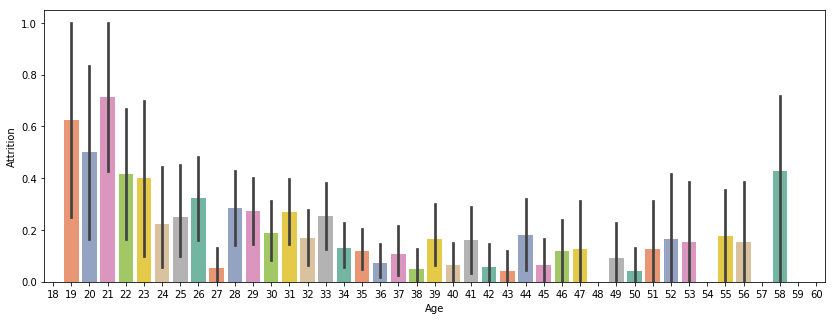

In [5]:
plt.figure(figsize=(14,5))
sns.barplot(x='Age', y='Attrition', data = data , palette = 'Set2')
#年龄处理
def resetAge(name):
    if (name < 22) & (name > 18) & (name == 58):
        return 1
    elif (name == 18) & (name == 48) & (name == 54) & (name == 57) & (name > 58) :
        return 0
    else:
        return 2



C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


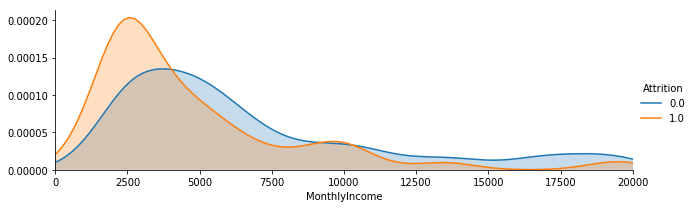

In [6]:
facet = sns.FacetGrid(data,hue = 'Attrition' ,aspect=3)
facet.map(sns.kdeplot,'MonthlyIncome',shade = True)
facet.set(xlim=(0,data['MonthlyIncome'].max()))
facet.add_legend()
#薪资处理
def resetSalary(s):
    if s>0 & s<3725:
        return 0
    elif s>=3725 & s<11250:
        return 1
    else:
        return 2


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


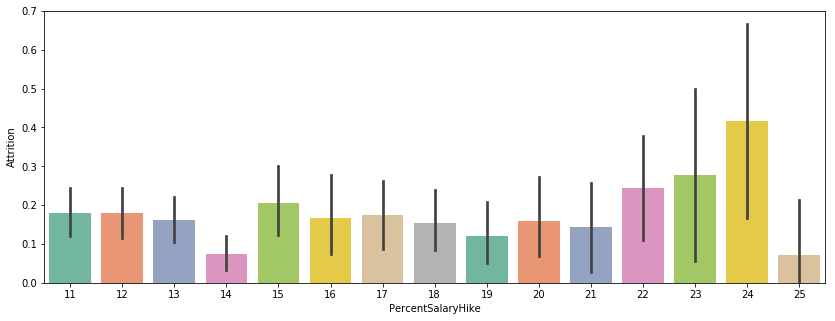

In [7]:
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike', y='Attrition', data = data , palette = 'Set2')
#工资提高比例
def resetPerHike(s):
    if s >= 24 & s < 25:
        return 0
    elif (s >= 11 & s < 14) | (s > 14 & s < 22):
        return 1
    else:
        return 2


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


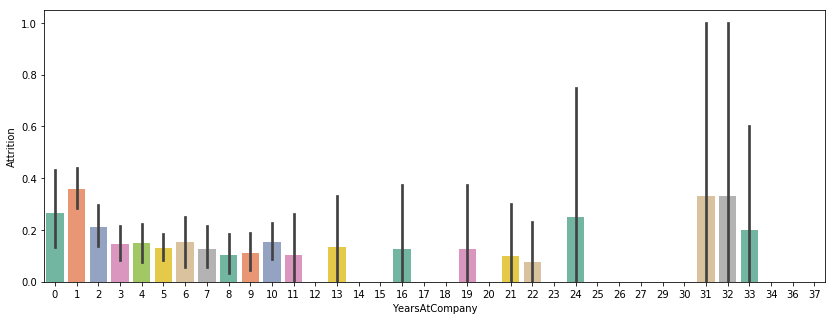

In [8]:
plt.figure(figsize=(14,5))
sns.barplot(x='YearsAtCompany', y='Attrition', data = data , palette = 'Set2')
#工作年限
def resetYearsAtCompany(name):
    if name >= 24 or name < 2:
        return 2
    elif name >=10 or name < 24:
        return 1
    else:
        return 0

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


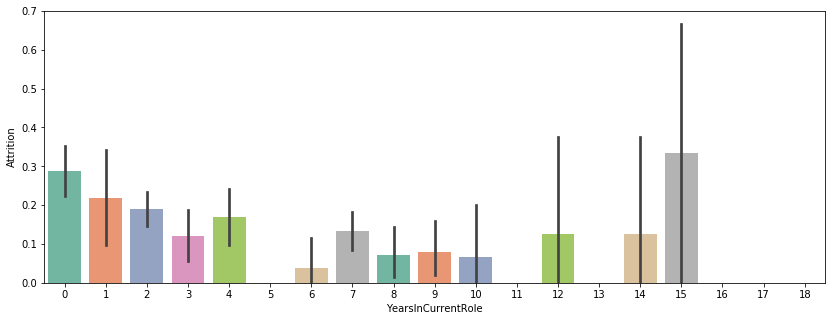

In [9]:
plt.figure(figsize=(14,5))
sns.barplot(x='YearsInCurrentRole', y='Attrition', data = data , palette = 'Set2')
#股票期权
def resetYearsInCurrentRolel(name):
    if name > 10:
        return 2
    elif name < 5:
        return 1
    else:
        return 0

In [10]:
#数据处理
data['PercentSalaryHike'] = data['PercentSalaryHike'].apply(resetPerHike)
data['MonthlyIncome'] = data['MonthlyIncome'].apply(resetSalary)
data['Age'] = data['Age'].apply(resetAge) 
data['YearsAtCompany'] = data['TotalWorkingYears'].apply(resetYearsAtCompany) 
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].apply(resetYearsInCurrentRolel) 

cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)
        
data = pd.concat([data,cata_result],axis=1)
data = data.drop(['StandardHours','Over18_Y','EmployeeNumber'],axis =1)

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

sep = 1100
X = data.iloc[0:sep,:].drop('Attrition',axis = 1)
y = data.iloc[0:sep,:]['Attrition']
data_test_use = data.iloc[sep:,:]
data_test_use1 = data_test_use.drop('Attrition',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

model = {}
model['LR'] = LogisticRegression(max_iter=10000)
model['svm'] = svm.SVC()
#设置随机森林系数
model['RMF'] = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6,
                                  max_features = 'sqrt')
model['CART'] = DecisionTreeClassifier()
model['KNN'] = KNeighborsClassifier()
for i in model:
    model[i].fit(X,y)
    score = cross_val_score(model[i],X,y,cv=5,scoring='accuracy')
    print("%s:%.3f(%.3f)"%(i,score.mean(),score.std()))
    pred = model[i].predict(X=X_test)
    tar_score = metrics.accuracy_score(y_test, pred)
    tar_score_true = metrics.recall_score(y_test, pred)
    tar_score_false = metrics.recall_score(y_test, pred, pos_label=0)
    print("理论准确率：", model[i].score(X_train, y_train))
    print("实际准确率:", tar_score)
    print("正例覆盖率：", tar_score_true)
    print("负例覆盖率：", tar_score_false)
    print("------------\n")
    break

LR:0.886(0.006)
理论准确率： 0.8896969696969697
实际准确率: 0.9418181818181818
正例覆盖率： 0.627906976744186
负例覆盖率： 1.0
------------



C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
#保存数据
result = (model['LR'].predict(data_test_use1)).astype('int')
data_predict = pd.DataFrame()
data_predict['result'] = result
data_predict.to_csv('sample.csv',index=None)